Plots generated for: ['DV1', 'DV2', 'DV3']


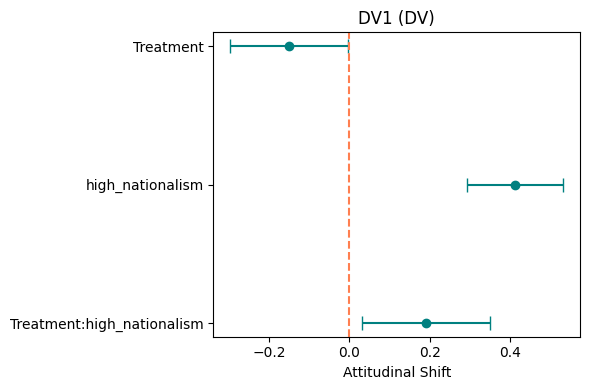

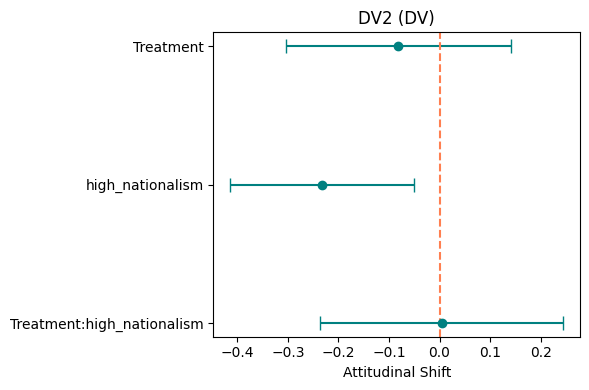

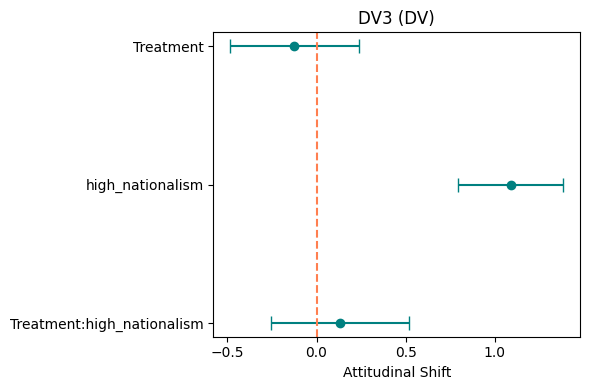

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your cleaned data
data = pd.read_csv('Cleaned_Survey_Data.csv')

# STEP 1 — Recode Q8 to numeric values for DV1
q8_map = {
    'The United States': 1,
    'Canada': 2,
    'Neither': 3,
    'Other': 3
}
if 'Q8' in data.columns:
    data['Q8'] = data['Q8'].map(q8_map)

# STEP 2 — Create DV1, DV2, DV3
data['DV1'] = data[['Q8', 'Q9']].astype(float).mean(axis=1)
data['DV2'] = data[['Q10', 'Q11', 'Q12']].astype(float).mean(axis=1)
data['DV3'] = pd.to_numeric(data['Q15'], errors='coerce')

# STEP 3 — Create nationalism and binary high_nationalism
data['nationalism'] = data[['Q5', 'Q6', 'Q7']].astype(float).mean(axis=1)
data['high_nationalism'] = (data['nationalism'] >= 3).astype(int)

# STEP 4 — Create interaction term
data['Treatment:high_nationalism'] = data['Treatment'] * data['high_nationalism']
independent_vars = ['Treatment', 'high_nationalism', 'Treatment:high_nationalism']

# STEP 5 — Run OLS regressions
results = {}
for dv in ['DV1', 'DV2', 'DV3']:
    if dv in data.columns:
        X = sm.add_constant(data[independent_vars])
        y = data[dv]
        model = sm.OLS(y, X, missing='drop').fit()
        results[dv] = model

# STEP 6 — Plotting function
def clean_coefplot(model, dv_label, color='teal'):
    coefs = model.params.drop("const")
    errors = model.bse[coefs.index]

    fig, ax = plt.subplots(figsize=(6, 4))
    y_labels = coefs.index[::-1]
    y_pos = range(len(y_labels))
    coef_vals = coefs.values[::-1]
    error_vals = errors.values[::-1]

    ax.errorbar(coef_vals, y_pos, xerr=error_vals, fmt='o', color=color, capsize=5)
    ax.axvline(0, color='coral', linestyle='--')
    ax.set_yticks(list(y_pos))
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Attitudinal Shift')
    ax.set_title(f'{dv_label} (DV)')
    plt.tight_layout()
    return fig

#  Generate and show plots
clean_plots = {}
for dv in results:
    fig = clean_coefplot(results[dv], dv)
    clean_plots[dv] = fig
    fig.show()

print("Plots generated for:", list(clean_plots.keys()))
